In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [36]:
heart = pd.read_csv('..\\data\\heart.csv').dropna()
heart.head()

,age,trestbps,chol,thalach,target
0,59,170,326,140,0
1,63,140,187,144,0
2,44,110,197,177,0
3,39,94,199,179,1
4,63,140,187,144,0


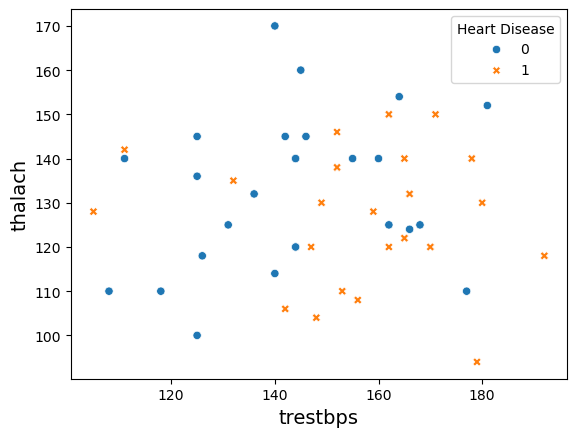

In [37]:
p = sns.scatterplot(data=heart, x='thalach', y='trestbps',
                    hue='target', style='target')

p.set_xlabel('trestbps', fontsize=14)
p.set_ylabel('thalach', fontsize=14)
p.legend(title='Heart Disease')

In [38]:
scaler = StandardScaler()

X = heart[['trestbps', 'thalach']]
y = heart[['target']]

X = scaler.fit_transform(X)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X, np.ravel(y))

knn.predict(X)
knn.score(X, np.ravel(y))

0.84

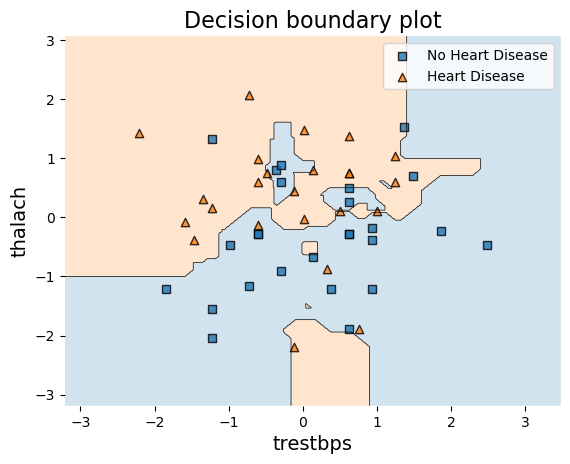

In [40]:
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X, np.ravel(y), clf=knn, contourf_kwargs=contourf_kwargs)

p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('trestbps', fontsize=14)
p.set_ylabel('thalach', fontsize=14)

L = plt.legend()
L.get_texts()[0].set_text('No Heart Disease')
L.get_texts()[1].set_text('Heart Disease')